In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import numpy
import scipy
import pandas as pd
%matplotlib inline



In [2]:
initial_val=10
t_end=50
step_size=0.001
ra=0.1
rb=0.5
total_steps= int(t_end/step_size)+1 
# print(total_steps)
quantity_a = np.zeros(total_steps)
quantity_b = np.zeros(total_steps)
quantity_c = np.zeros(total_steps)
quantity_d= np.zeros(total_steps)
quantity_a[0]=initial_val
quantity_d[0]=quantity_a[0]


In [3]:
for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    quantity_c[i] = quantity_c[i-1] + rb*quantity_b[i-1]*step_size
    quantity_d[i]=quantity_a[i]+quantity_b[i]+quantity_c[i]
    # total_radioactivity[i]=ra*quantity_a[i-1]+rb*quantity_b[i-1]


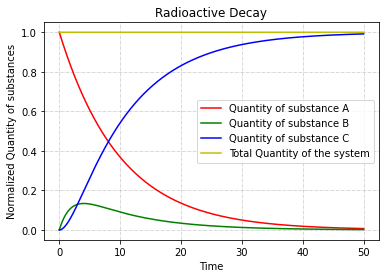

In [4]:
x_axis=np.linspace(0,t_end,total_steps)
# print(x_axis.shape)
plt.figure(1)
plt.plot(x_axis,quantity_a/initial_val,'r' )
plt.plot(x_axis,quantity_b/initial_val,'g')
plt.plot(x_axis, quantity_c/initial_val,'b')
plt.plot(x_axis, quantity_d/initial_val,'y')
plt.legend(['Quantity of substance A','Quantity of substance B','Quantity of substance C','Total Quantity of the system'])
# plt.plot(x_axis,total_radioactivity/initial_val,'y')
plt.title('Radioactive Decay')
plt.ylabel('Normalized Quantity of substances')
plt.xlabel('Time')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)

plt.show()


In [5]:

df=pd.DataFrame({'Time':x_axis[0::5000],'Quantity of A':quantity_a[0::5000],'Quantity of B':quantity_b[0::5000],'Quantity of C':quantity_c[0::5000]})
df.set_index('Time')
print(df)

    Time  Quantity of A  Quantity of B  Quantity of C
0    0.0      10.000000       0.000000       0.000000
1    5.0       6.065155       1.311205       2.623641
2   10.0       3.678610       0.902829       5.418561
3   15.0       2.231134       0.556403       7.212462
4   20.0       1.353217       0.338191       8.308591
5   25.0       0.820747       0.205178       8.974075
6   30.0       0.497796       0.124448       9.377756
7   35.0       0.301921       0.075480       9.622599
8   40.0       0.183120       0.045780       9.771100
9   45.0       0.111065       0.027766       9.861169
10  50.0       0.067363       0.016841       9.915797


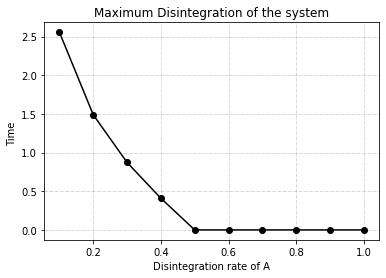

In [7]:
# part c
#when ra exceeds rb , the first element becomes the greatest
rb=0.5
total_radioactivity=np.zeros(total_steps)
max_val=[]
for j in range(1,11,1):
    quantity_a[0]=initial_val
    quantity_b[0]=quantity_c[0]=0
    total_radioactivity[0]=0
    min_val=-99
    ind=0
    for i in range(1,total_steps):
        quantity_a[i] = quantity_a[i-1]-0.1*j*quantity_a[i-1]*step_size
        quantity_b[i] = quantity_b[i-1] + (0.1*j*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
        quantity_c[i] = quantity_c[i-1] + rb*quantity_b[i-1]*step_size
        total_radioactivity[i]=j/10*quantity_a[i-1]+rb*quantity_b[i-1]
        if(total_radioactivity[i]>min_val):
            ind=i
            min_val=total_radioactivity[i]
    max_val.append(ind*step_size)
x_axis=np.linspace(0.1,1,10)
plt.plot(x_axis,max_val,'-ok')
plt.title('Maximum Disintegration of the system')
plt.xlabel('Disintegration rate of A')
plt.ylabel('Time ')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)

plt.show()



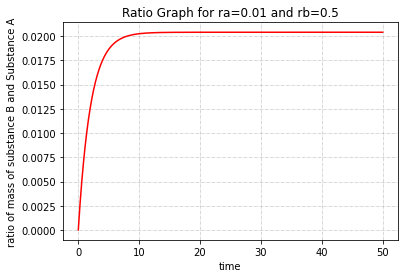

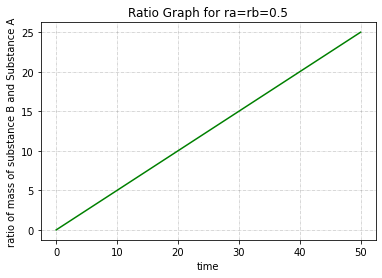

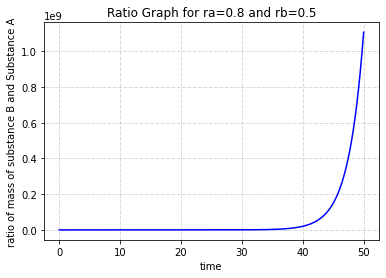

In [8]:
# part (e)
rb=0.5
ra=0.01
# initial_val=10
quantity_a[0]=initial_val
quantity_b[0]=0
ratio_1=np.zeros(total_steps-1)
ratio_2=np.zeros(total_steps-1)
ratio_3=np.zeros(total_steps-1)

for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    ratio_1[i-1] = quantity_b[i]/quantity_a[i]

ra=0.5
quantity_a[0]=initial_val
quantity_b[0]=0
for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    ratio_2[i-1] = quantity_b[i]/quantity_a[i]

ra=0.9
quantity_a[0]=initial_val
quantity_b[0]=0
for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    ratio_3[i-1] = quantity_b[i]/quantity_a[i]
x_axis=np.linspace(0,t_end,total_steps-1)
plt.figure(1)
plt.plot(x_axis,ratio_1,'r')
plt.xlabel('time')
plt.ylabel('ratio of mass of substance B and Substance A')
plt.title('Ratio Graph for ra=0.01 and rb=0.5')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)

plt.figure(2)
plt.plot(x_axis,ratio_2,'g')
plt.xlabel('time')
plt.ylabel('ratio of mass of substance B and Substance A')
plt.title('Ratio Graph for ra=rb=0.5')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)


plt.figure(3)
plt.plot(x_axis,ratio_3,'b')
plt.xlabel('time')
plt.ylabel('ratio of mass of substance B and Substance A')
plt.title('Ratio Graph for ra=0.8 and rb=0.5')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.show()

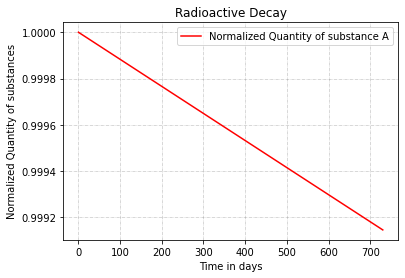

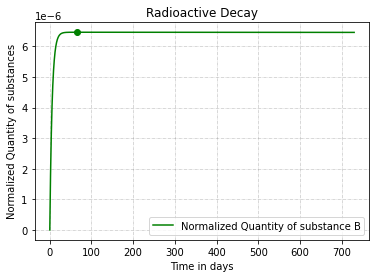

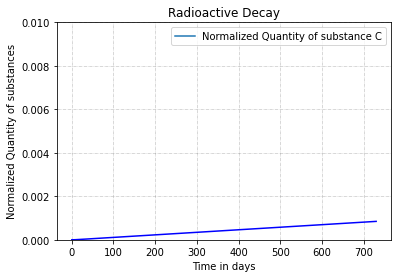

Max mass (in g) of Rn is : 6.463593654299678e-05
Maximum Mass is attained on day number : 65.6


In [10]:
# part (g) and part(m)
# both b and c tend to 0 and a almost remains constant
# mention intial_mass in question.  technically only time required
ra=0.00000117
rb=0.181
initial_val=10
t_end=365*2
step_size=0.1
total_steps= int(t_end/step_size)+1 
quantity_a = np.zeros(total_steps)
quantity_b = np.zeros(total_steps)
quantity_c = np.zeros(total_steps)
quantity_a[0]=initial_val
x_axis=np.linspace(0,t_end,total_steps)

for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    quantity_c[i] = quantity_c[i-1] + rb*quantity_b[i-1]*step_size
    

y1=np.max(quantity_b)/initial_val
x1=np.argmax(quantity_b)

plt.figure(1)
plt.plot(x_axis,quantity_a/initial_val,'r' )
plt.title('Radioactive Decay')
plt.ylabel('Normalized Quantity of substances')
plt.xlabel('Time in days')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.legend(['Normalized Quantity of substance A'])
# plt.ylim(bottom=0.98)
plt.show()


plt.figure(2)
plt.plot(x_axis,quantity_b/initial_val,'g')
plt.plot(x1/10,y1,'go')
plt.title('Radioactive Decay')
plt.ylabel('Normalized Quantity of substances')
plt.xlabel('Time in days')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.legend(['Normalized Quantity of substance B'])

plt.show()


plt.plot(3)
plt.plot(x_axis, quantity_c/initial_val,'b')
plt.legend(['Normalized Quantity of substance C'])
plt.title('Radioactive Decay')
plt.ylabel('Normalized Quantity of substances')
plt.xlabel('Time in days')
plt.ylim(top=0.01,bottom=0)
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.show()

print("Max mass (in g) of Rn is :",end=" ")
print(y1*initial_val)
print("Maximum Mass is attained on day number :",end=" ")
print((x1+1)/10)

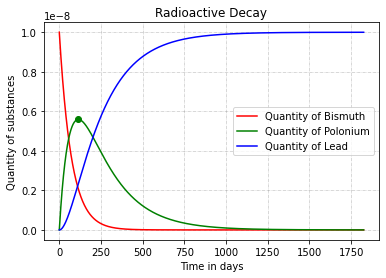

Max mass (in g) of Polonium is : 5.587980548859527e-09
Maximum Mass is attained on day number : 115


In [14]:
# part (i)
ra=0.0137
rb=0.0051
initial_val=1e-8
t_end=365*5
step_size=1
total_steps= int(t_end/step_size)+1 
quantity_a = np.zeros(total_steps)
quantity_b = np.zeros(total_steps)
quantity_c = np.zeros(total_steps)
# quantity_d= np.zeros(total_steps)
quantity_a[0]=initial_val
# quantity_d[0]=quantity_a[0]

for i in range(1,total_steps):
    quantity_a[i] = quantity_a[i-1]-ra*quantity_a[i-1]*step_size
    quantity_b[i] = quantity_b[i-1] + (ra*quantity_a[i-1] - rb*quantity_b[i-1])*step_size
    quantity_c[i] = quantity_c[i-1] + rb*quantity_b[i-1]*step_size
    # quantity_d[i]=quantity_a[i]+quantity_b[i]+quantity_c[i]

x_axis=np.linspace(0,t_end,total_steps)
y1=np.max(quantity_b)
x1=np.argmax(quantity_b)
# print(x_axis.shape)
plt.figure(1)
plt.plot(x_axis,quantity_a,'r' )
plt.plot(x_axis,quantity_b,'g')
plt.plot(x_axis, quantity_c,'b')
plt.plot(x1,y1,'go')
plt.legend(['Quantity of Bismuth','Quantity of Polonium','Quantity of Lead'])
plt.title('Radioactive Decay')
plt.ylabel('Quantity of substances')
plt.xlabel('Time in days')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.show()
print("Max mass (in g) of Polonium is :",end=" ")
print(y1)
print("Maximum Mass is attained on day number :",end=" ")
print(x1+1)


In [12]:
a=np.linspace(0,1,11)
print(a[0: :2])
# arr[1: :2]

[0.  0.2 0.4 0.6 0.8 1. ]


In [13]:
print(x_axis.size)

1826
